# Astro 410 Homework 2
## Fitting Functions: Levenberg-Marquardt Algorithm
### Swapnil Dubey

List of included files:
-   hw2-dubey.ipynb 
-   hw2-dubey.py 
-   hw2-fitting.dat
-   Final-Lorentzian+Gaussian.png
-   Final-Lorentzian.png
-   Final-Gaussian.png
-   hw2-dubey.pdf
-   hw2-dubey.html

Note: While the PDF and ".py" version of the files are included, it is recommended that the assignment is viewed in it's HTML or iPython/Jupyter Notebook (.ipynb) version for optimal viewing.

1. [50 points] Write a program to implement the Levenberg-Marquardt method
(or use a third-party code or the built-in fitting function for only 20 points) to
fit the data hw2-fitting.dat posted on CANVAS
first a **Lorentzian**
$$  \Large\phi(\nu) = \frac{1}{\pi}  \frac{\alpha_L}{(\nu-\nu_0)^2 + \alpha_L^2}$$
and then a **Gaussian**
$$ \Large\phi(\nu) = \frac{1}{\alpha}  \sqrt{\frac{ln2}{\pi}}e^{\frac{-(ln2)(\nu-\nu_0)^2}{\alpha_D^2}}$$
which is in the format ν φ e, where ν is the frequency , φ is the line strength,
and e is the estimated error in each φ.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Import data as Pandas DataFrame
df = pd.read_csv("hw2_fitting.dat", sep="\s+", header=None)

## Lorentzian

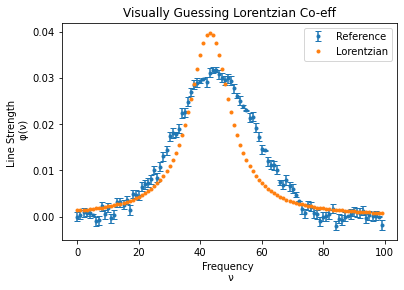

In [2]:
#Def Function for our Lorentzian 
def phiL(v, v_0, alpha_L):
    return (1/np.pi) * alpha_L/((v-v_0)**2 + alpha_L**2)


# Use Guess values to plot and manually choose good starting guess for fitting curve 
# Guess as dict
guess = {'v_0':43, 'alpha_L':8, 'alpha':50, 'alpha_D':50}
# Guess as array; v_0: alpha_L
guess1 = [43, 8]


# Calculating output with our guessed inputs so we can build plot
n = len(df[1])
y = np.empty(n)

for i in range(n):
    y[i] = phiL(df[0][i],guess['v_0'], guess['alpha_L'])


# Testing manually by comparing side-by-side with reference values
plt.errorbar(df[0], df[1], yerr=df[2], fmt='.', capsize=3)
plt.errorbar(df[0], y, fmt='.')
plt.ylabel("Line Strength \n \u03C6(\u03BD)")
plt.xlabel("Frequency \n \u03BD")
plt.title("Visually Guessing Lorentzian Co-eff")
plt.legend(['Reference', 'Lorentzian'])

## Gausian

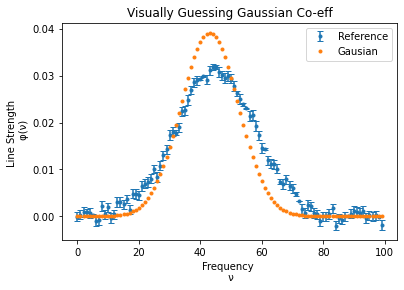

In [3]:
#Def Function for our Gaussian 
def phiG(v, v_0, alpha, alpha_D):
    return ((1 / alpha) * np.sqrt(np.log(2) / np.pi) * np.exp(-1 * np.log(2) * (v-v_0)**2 / alpha_D**2))


# Use Guess values to plot and manually choose good starting guess for fitting curve 
# Guess as dict
guess = {'v_0':43, 'alpha_L':8, 'alpha':12, 'alpha_D':11}
# Guess as array; v_0: alpha: alpha_D
guess2 = [43, 12, 11]


# Calculating output with our guessed inputs so we can build plot
n = len(df[1])
y, yG = np.empty(n), np.empty(n)

for i in range(n):
    y[i] = phiG(df[0][i],guess['v_0'], guess['alpha'], guess['alpha_D'])


# Testing manually by comparing side-by-side with reference values
plt.errorbar(df[0], df[1], yerr=df[2], fmt='.', capsize=3)
plt.errorbar(df[0], y, fmt='.')
plt.ylabel("Line Strength \n \u03C6(\u03BD)")
plt.xlabel("Frequency \n \u03BD")
plt.title("Visually Guessing Gaussian Co-eff")
plt.legend(['Reference', 'Gausian'])

2. [25 points] What values of αL and ν0 do you get for the Lorentzian, and what
values of αD and ν0 do you get for the Gaussian? Also report the error estimates
for the fitting parameters. Which model is a better fit to the data?

## Lorentzian
$$ \Large \nu_0 = 46.26902627 \pm 0.25582894  $$
$$ \Large \alpha_L = 7.54556338 \pm 0.32845777 $$

## Gaussian
$$ \Large \nu_0 = 44.91914468 \pm 0.04116516 $$
$$ \Large \alpha_D = 15.04509641 \pm 0.06398338 $$

**Gaussian** is a better fit due to lower errors in it's parameter values and according to the plots below. We can see that the scatter plot with the Gaussian function follows the reference values more closely and almost all values are within the reference value errorbars.

3. [25 points] Plot the data and the fittings. Be sure to include the error-bars. 

# Plots
Combined plot with **Reference** values, output of **Lorentzian** and **Gaussian** functions

Note: For individiul plots of Lorentzian and Gaussian keep scrolling down

LORENTZIAN: 
 coeefficient estimates:
 [46.26902627  7.54556338] 

Covariance Matrix of estimates is: 
 [[ 0.06544845 -0.05440232]
 [-0.05440232  0.1078845 ]] 

Error of Coefficients is:
 [0.25582894 0.32845777]

GOUSSIAN: 
 coeefficient estimates:
 [44.91914468 15.01221134 15.04509641] 

Covariance Matrix of estimates is: 
 [[ 0.00409387 -0.0006862  -0.00245876]
 [-0.0006862   0.00149747  0.00075861]
 [-0.00245876  0.00075861  0.00169457]] 

Error of Coefficients is:
 [0.06398338 0.03869716 0.04116516]



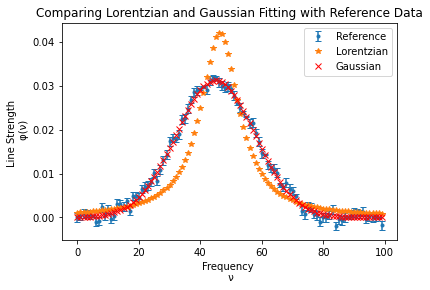

In [4]:
# Changing DataFrame column to arrays
x = df[0].values
ref = df[1].values
err = df[2].values


# Extracting fitted values in 'c' and covairience as 'cov'
c, cov = curve_fit(phiL, x,ref, guess1, sigma = err)
# Check output for fitted variables
print(f"LORENTZIAN: \n coeefficient estimates:\n {c} \n")
print(f"Covariance Matrix of estimates is: \n {cov} \n")
errL = np.sqrt(np.diag(cov))
print(f"Error of Coefficients is:\n {errL}\n")


# Calculating output with fitted inputs so we can build plot
for i in range(n):
    y[i] = phiL(df[0][i],c[0], c[1])    # Calling Lorentzian function


# Extracting fitted values in 'c' and covairience as 'cov'
cG, covG = curve_fit(phiG, x, ref, guess2, sigma = err)

# Check output for fitted variables
print(f"GOUSSIAN: \n coeefficient estimates:\n {cG} \n")
print(f"Covariance Matrix of estimates is: \n {covG} \n")
errG = np.sqrt(np.diag(covG))
print(f"Error of Coefficients is:\n {errG}\n")

 
# Calculating output with fitted inputs so we can build plot
for i in range(n):
    yG[i] = phiG(df[0][i],cG[0], cG[1], cG[2]) # Calling Gaussian function


# Building plot
plt.errorbar(df[0], df[1], yerr=df[2], fmt='.', capsize=3)
plt.errorbar(df[0], y, fmt='*')
plt.errorbar(df[0], yG, fmt='x', color='Red')
plt.ylabel("Line Strength \n \u03C6(\u03BD)")
plt.xlabel("Frequency \n \u03BD")
plt.title("Comparing Lorentzian and Gaussian Fitting with Reference Data")
plt.legend(['Reference', 'Lorentzian', 'Gaussian'])
plt.savefig('Final-Lorentzian+Gaussian.png')

## Lorentzian Plot with Respect to Reference Values

LORENTZIAN: 
 coeefficient estimates:
 [46.26902627  7.54556338] 

Covariance Matrix of estimates is: 
 [[ 0.06544845 -0.05440232]
 [-0.05440232  0.1078845 ]] 

Error is:
 [0.25582894 0.32845777]



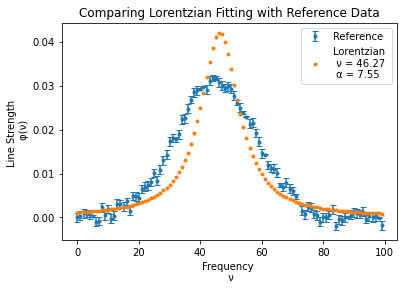

In [5]:
# Changing DataFrame column to arrays
x = df[0].values
ref = df[1].values
err = df[2].values


# Extracting fitted values in 'c' and covairience as 'cov'
c, cov = curve_fit(phiL, x,ref, guess1, sigma = err)
# Check output for fitted variables
print(f"LORENTZIAN: \n coeefficient estimates:\n {c} \n")
print(f"Covariance Matrix of estimates is: \n {cov} \n")
print(f"Error is:\n {np.sqrt(np.diag(cov))}\n")


# Calculating output with fitted inputs so we can build plot
for i in range(n):
    y[i] = phiL(df[0][i],c[0], c[1])    # Calling Lorentzian function

# Building plot
plt.errorbar(df[0], df[1], yerr=df[2], fmt='.', capsize=3)
plt.errorbar(df[0], y, fmt='.')
plt.ylabel("Line Strength \n \u03C6(\u03BD)")
plt.xlabel("Frequency \n \u03BD")
plt.title("Comparing Lorentzian Fitting with Reference Data")
plt.legend(['Reference', f'Lorentzian \n \u03BD = {round(c[0],2)} \n \u03B1 = {round(c[1],2)}'])
plt.savefig('Final-Lorentzian.png')

## Gaussian Plot with Respect to Reference Values

coeefficient estimates:
[44.91914468 15.01221134 15.04509641]
Covariance Matrix of estimates is:
[[ 0.00409387 -0.0006862  -0.00245876]
 [-0.0006862   0.00149747  0.00075861]
 [-0.00245876  0.00075861  0.00169457]]
Error is:
[0.06398338 0.03869716 0.04116516]


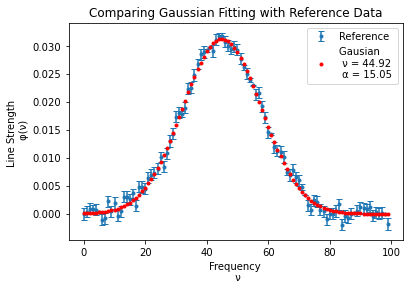

In [6]:
# Changing DataFrame column to arrays
x = df[0].values
ref = df[1].values
err = df[2].values

# Extracting fitted values in 'c' and covairience as 'cov'
cG, covG = curve_fit(phiG, x, ref, guess2, sigma = err)

# Check output for fitted variables
print(f"coeefficient estimates:")
print(cG)
print(f"Covariance Matrix of estimates is:")
print(covG)
print(f"Error is:")
print(np.sqrt(np.diag(covG)))

 
# Calculating output with fitted inputs so we can build plot
for i in range(n):
    yG[i] = phiG(df[0][i],cG[0], cG[1], cG[2]) # Calling Gaussian function

# Building plot
plt.errorbar(df[0], df[1], yerr=df[2], fmt='.', capsize=3)
plt.errorbar(df[0], yG, fmt='.', color='Red')
plt.ylabel("Line Strength \n \u03C6(\u03BD)")
plt.xlabel("Frequency \n \u03BD")
plt.title("Comparing Gaussian Fitting with Reference Data")
plt.legend(['Reference', f'Gausian \n \u03BD = {round(cG[0],2)} \n \u03B1 = {round(cG[2],2)}'])
plt.savefig('Final-Gaussian.png')